### Modelling statistical learning

To explore the effect of sleep on statistical learning, Durrant et al. (2011) constructed two types of sequence, both made up of regular tones at differing frequencies. One type had a structure in which the preceding two tones determined the next, except for a few transitions which were random to avoid repetition. The other type was the reverse – most transitions were random. After listening to a structured sequence, participants were tested on their ability distinguish short structured and unstructured sequences. Delayed recall was then tested, after a night’s sleep for one group, and after a waking rest for the other. Durrant et al. (2011) found that sleep improved performance more than waking rest, suggesting systems consolidation promotes statistical learning.

Here, we generate a set of sequences based on the transition structure in Durrant et al. (2011). A model with the GPT-2 architecture is trained from scratch on the structured sequences only. At the end of each epoch of the training, the perplexity is calculated for a two test sets of structured and unstructured sequences. We find that the difference in perplexity of these two sets increases over time, corresponding to improved ability to distinguish them. In addition, outputs from the trained model are structured in the same way as the training data.

Tested with conda_pytorch_latest_p36 kernel in AWS SageMaker.

#### Installation:

In [ ]:
!pip install simpletransformers

#### Imports:

In [1]:
import pandas as pd
import random
import logging
from random import shuffle
from matplotlib import pyplot as plt
from statistical_learning_utils import *
from gpt import GPT

In [2]:
def get_random_sequence():
    start = [random.randint(1,5),random.randint(1,5)]
    for i in range(50):
        next_val = random.randint(1,5)
        start.append(next_val)
    return ','.join([str(i) for i in start])

text_file = open("train.txt", "w")
walks = [get_sequence() for i in range(3000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("val.txt", "w")
walks = [get_sequence() for i in range(1000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("structured_test.txt", "w")
walks = [get_sequence() for i in range(1000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

text_file = open("unstructured_test.txt", "w")
walks = [get_random_sequence() for i in range(1000)]
shuffle(walks)
n = text_file.write('\n'.join(walks))
text_file.close()

#### Train generative model

Train GPT-2 from scratch on dataset created above.

In [3]:
structured_test_file = "structured_test.txt"
unstructured_test_file = "unstructured_test.txt"

perplexity_structured = []
perplexity_unstructured = []

for num in [1, 2, 3]:

    # Train the model
    gpt = GPT(vocab_size=10)
    model = gpt.train(segmented_sequence_list=[], best_model_dir='outputs_durrant', train_file="train.txt", test_file="val.txt", eps=num)
    
    p = model.eval_model(structured_test_file)
    perplexity_structured.append(p)
    p = model.eval_model(unstructured_test_file)
    perplexity_unstructured.append(p)

INFO:simpletransformers.language_modeling.language_modeling_model: Training of None tokenizer complete. Saved to outputs_durrant.
INFO:simpletransformers.language_modeling.language_modeling_model: Training language model from scratch


You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 261. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/3000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2452 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/2452 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "
INFO:simpletransformers.language_modeling.language_modeling_model: Training of gpt2 model complete. Saved to outputs_durrant.
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/1000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_structured_test.txt


Running Evaluation:   0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.6439113047890447, 'perplexity': tensor(1.9039)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/1000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_unstructured_test.txt


Running Evaluation:   0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 1.1400788932710413, 'perplexity': tensor(3.1270)}
INFO:simpletransformers.language_modeling.language_modeling_model: Training of None tokenizer complete. Saved to outputs_durrant.
INFO:simpletransformers.language_modeling.language_modeling_model: Training language model from scratch


You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 261. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/3000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2452 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/2452 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 2:   0%|          | 0/2452 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model: Training of gpt2 model complete. Saved to outputs_durrant.
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/1000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_structured_test.txt


Running Evaluation:   0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.34565218615561105, 'perplexity': tensor(1.4129)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/1000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_unstructured_test.txt


Running Evaluation:   0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 1.5507458817564872, 'perplexity': tensor(4.7150)}
INFO:simpletransformers.language_modeling.language_modeling_model: Training of None tokenizer complete. Saved to outputs_durrant.
INFO:simpletransformers.language_modeling.language_modeling_model: Training language model from scratch


You are resizing the embedding layer without providing a `pad_to_multiple_of` parameter. This means that the new embedding dimension will be 261. This might induce some performance reduction as *Tensor Cores* will not be available. For more details about this, or help on choosing the correct value for resizing, refer to this guide: https://docs.nvidia.com/deeplearning/performance/dl-performance-matrix-multiplication/index.html#requirements-tc
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/3000 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/2452 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_train.txt
INFO:simpletransformers.language_modeling.language_modeling_model: Training started


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/2452 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:139: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 3:   0%|          | 0/2452 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/2452 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model: Training of gpt2 model complete. Saved to outputs_durrant.
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_structured_test.txt


Running Evaluation:   0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 0.31751694262137176, 'perplexity': tensor(1.3737)}
INFO:simpletransformers.language_modeling.language_modeling_utils: Creating features from dataset file at cache_dir/


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_utils: Saving features into cached file cache_dir/gpt2_cached_lm_126_unstructured_test.txt


Running Evaluation:   0%|          | 0/817 [00:00<?, ?it/s]

INFO:simpletransformers.language_modeling.language_modeling_model:{'eval_loss': 1.6417294682312478, 'perplexity': tensor(5.1641)}


Let's sample some outputs from the trained model:

In [4]:
gpt = GPT(base_model='outputs_durrant', base_model_name='gpt2')

In [5]:
gpt.continue_input('1,5,', do_sample=False)

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,4,5,2,1,5,5,3,5,4,4,3,5,4,5,2,4,4,4,3,5,4,5,2,4,5,2,1,1,5,4,4,4,4,5,4,4,3,5,4,4,4,3,5,4,4,3,5,4,


#### Plot perplexity against time

In [6]:
perplexity_structured = [p['perplexity'] for p in perplexity_structured]
perplexity_unstructured = [p['perplexity'] for p in perplexity_unstructured]

perplexity_structured = [float(p.detach().numpy()) for p in perplexity_structured]
perplexity_unstructured = [float(p.detach().numpy()) for p in perplexity_unstructured]

<Figure size 640x480 with 0 Axes>

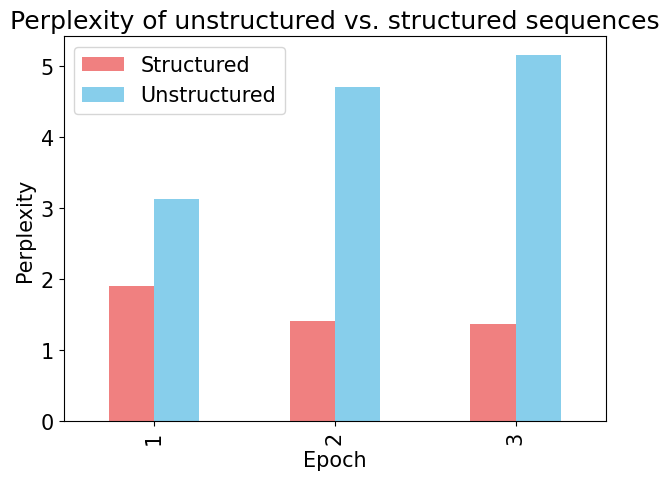

In [7]:
plt.figure()
plt.rcParams.update({'font.size' : 15})

epochs = [1,2,3]
groups = [perplexity_structured, perplexity_unstructured]

df = pd.DataFrame({'Structured': perplexity_structured, 'Unstructured': perplexity_unstructured}, index=epochs)
plot = df.plot.bar(title='Perplexity of unstructured vs. structured sequences', 
            color={'Structured': 'lightcoral', 'Unstructured': 'skyblue'},
           xlabel='Epoch', figsize=(7,5), ylabel='Perplexity')

plt.savefig('durrant_data.png')